In [1]:
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.stats.outliers_influence as sso
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
import scipy
import statsmodels

Файл с данными находится в той же папке, что и ноутбук. 

In [2]:
original = pd.read_csv('table_cian_mos_ecm.csv')

Исключаем наблюдения с номера 6001 до номера 8000 c учетом того, что нумерация начинается с нуля, а последний элемент указывается невключительно.

In [3]:
data = original.drop(original.index[6000:8000]) 
del data['Unnamed: 0']
# data.info()

In [4]:
data.head()

,price,total_area,discrim_proxy,Mos_center,Akimanka_rajon,Hamovniki_rajon,Tverskoj_rajon,Taganskij_rajon,Krasnoselskij_rajon,Mesanskij_rajon,...,three_rooms,starii_fond,blochnii,derevjannii,kirpichnii,monolitnii,panelnii,stalinskii,repair,four_and_over_rooms
0,75000.0,123.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,26000.0,30.8,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,30000.0,38.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,200000.0,160.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,48000.0,50.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Variance Inflation Factor

Значение коэффициента VIF для всех переменных не превышает 10. Однако для переменных one_room, two_rooms, three_rooms, total_area значение VIF достаточно большое. Но это в общем-то логично: чем больше комнат, тем больше площадь квартиры. 

In [5]:
X = data[data.columns.difference(['price', 'Mos_center', 'four_and_over_rooms'])].assign(const=1)
vif = pd.Series([sso.variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).round(2)
print(vif)

Akimanka_rajon          1.05
Arbat_rajon             1.09
Basmannyj_rajon         1.01
Hamovniki_rajon         1.02
Krasnoselskij_rajon     1.01
Mesanskij_rajon         1.04
Taganskij_rajon         1.00
Tverskoj_rajon          1.12
Zamoskvorece_rajon      1.02
blochnii                1.21
derevjannii             1.00
discrim_proxy           1.07
first_floor             1.02
kirpichnii              1.46
monolitnii              1.39
one_room                7.11
panelnii                1.72
repair                  1.13
stalinskii              1.06
starii_fond             1.02
three_rooms             3.56
total_area              3.22
two_rooms               6.19
const                  58.67
dtype: float64


In [6]:
# print(vif.to_latex())

## Таблица с описательной статистикой

In [7]:
des_stat = (data.describe()).round(2)
des_stat.T

,count,mean,std,min,25%,50%,75%,max
price,24041.0,70512.51,59154.57,600.0,30000.0,43500.0,90000.0,250000.0
total_area,24041.0,67.91,35.84,8.0,42.0,56.0,81.2,310.0
discrim_proxy,24041.0,0.18,0.39,0.0,0.0,0.0,0.0,1.0
Mos_center,24041.0,0.17,0.37,0.0,0.0,0.0,0.0,1.0
Akimanka_rajon,24041.0,0.02,0.14,0.0,0.0,0.0,0.0,1.0
Hamovniki_rajon,24041.0,0.01,0.10,0.0,0.0,0.0,0.0,1.0
Tverskoj_rajon,24041.0,0.05,0.22,0.0,0.0,0.0,0.0,1.0
Taganskij_rajon,24041.0,0.01,0.08,0.0,0.0,0.0,0.0,1.0
Krasnoselskij_rajon,24041.0,0.01,0.07,0.0,0.0,0.0,0.0,1.0
Mesanskij_rajon,24041.0,0.02,0.14,0.0,0.0,0.0,0.0,1.0


In [8]:
# print(des_stat.T.to_latex())

In [9]:
data.columns

Index(['price', 'total_area', 'discrim_proxy', 'Mos_center', 'Akimanka_rajon',
       'Hamovniki_rajon', 'Tverskoj_rajon', 'Taganskij_rajon',
       'Krasnoselskij_rajon', 'Mesanskij_rajon', 'Zamoskvorece_rajon',
       'Basmannyj_rajon', 'Arbat_rajon', 'first_floor', 'one_room',
       'two_rooms', 'three_rooms', 'starii_fond', 'blochnii', 'derevjannii',
       'kirpichnii', 'monolitnii', 'panelnii', 'stalinskii', 'repair',
       'four_and_over_rooms'],
      dtype='object')

In [10]:
p = data['one_room'] + data['two_rooms'] + data['three_rooms'] + data['four_and_over_rooms']
p.sum()

24041

## Цветная корреляционная матрица (два варианта)

In [11]:
#sns.set_palette("Blues")

In [12]:
corr = data.corr()
data.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('BuPu'), axis=1)

,price,total_area,discrim_proxy,Mos_center,Akimanka_rajon,Hamovniki_rajon,Tverskoj_rajon,Taganskij_rajon,Krasnoselskij_rajon,Mesanskij_rajon,Zamoskvorece_rajon,Basmannyj_rajon,Arbat_rajon,first_floor,one_room,two_rooms,three_rooms,starii_fond,blochnii,derevjannii,kirpichnii,monolitnii,panelnii,stalinskii,repair,four_and_over_rooms
price,1.0,0.8,-0.24,0.55,0.23,0.12,0.33,-0.0054,0.019,0.17,0.1,0.037,0.27,-0.091,-0.42,-0.18,0.36,0.095,-0.12,-0.017,0.0084,0.12,-0.35,0.083,0.26,0.43
total_area,0.8,1.0,-0.22,0.31,0.15,0.044,0.19,-0.015,0.0044,0.11,0.051,0.031,0.15,-0.1,-0.52,-0.21,0.42,0.064,-0.14,-0.01,-0.032,0.17,-0.29,0.048,0.24,0.56
discrim_proxy,-0.24,-0.22,1.0,-0.16,-0.06,-0.047,-0.082,-0.0062,-0.018,-0.053,-0.033,-0.021,-0.073,0.031,0.12,0.05,-0.11,-0.022,0.061,-0.01,-0.031,-0.066,0.14,-0.043,-0.13,-0.11
Mos_center,0.55,0.31,-0.16,1.0,0.32,0.23,0.51,0.18,0.16,0.31,0.24,0.17,0.45,-0.034,-0.21,-0.057,0.18,0.1,-0.057,-0.0096,0.16,-0.079,-0.26,0.12,0.15,0.15
Akimanka_rajon,0.23,0.15,-0.06,0.32,1.0,-0.015,-0.033,-0.012,-0.011,-0.02,-0.015,-0.011,-0.029,-0.032,-0.071,-0.0011,0.035,0.035,-0.0081,-0.0031,0.011,-0.0077,-0.089,0.0072,0.053,0.063
Hamovniki_rajon,0.12,0.044,-0.047,0.23,-0.015,1.0,-0.024,-0.0084,-0.0077,-0.014,-0.011,-0.0081,-0.021,-0.0075,-0.055,0.0013,0.054,-0.0057,-0.023,-0.0022,0.045,-0.028,-0.067,0.041,0.038,0.0038
Tverskoj_rajon,0.33,0.19,-0.082,0.51,-0.033,-0.024,1.0,-0.019,-0.017,-0.032,-0.025,-0.018,-0.046,-0.031,-0.12,-0.064,0.12,0.065,-0.054,-0.0049,0.11,-0.049,-0.15,0.081,0.08,0.11
Taganskij_rajon,-0.0054,-0.015,-0.0062,0.18,-0.012,-0.0084,-0.019,1.0,-0.006,-0.011,-0.0086,-0.0063,-0.016,-0.012,-0.0016,0.0089,-0.0017,-0.0044,0.019,-0.0017,0.014,-0.0027,0.0055,-0.0062,0.0043,-0.01
Krasnoselskij_rajon,0.019,0.0044,-0.018,0.16,-0.011,-0.0077,-0.017,-0.006,1.0,-0.01,-0.0079,-0.0057,-0.015,-0.012,-0.0076,0.00063,-0.004,0.017,0.0093,-0.0016,0.027,-0.026,-0.022,0.0085,0.022,0.017
Mesanskij_rajon,0.17,0.11,-0.053,0.31,-0.02,-0.014,-0.032,-0.011,-0.01,1.0,-0.015,-0.011,-0.028,0.0043,-0.063,-0.042,0.081,0.0039,-0.014,-0.0029,0.038,-0.02,-0.075,0.0069,0.034,0.048


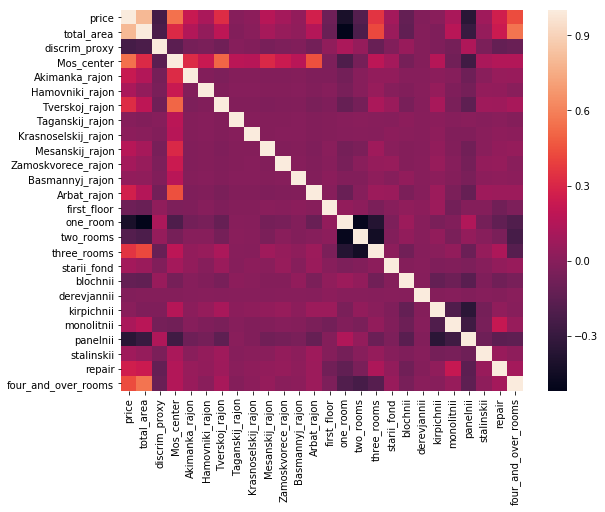

In [13]:
matplotlib.rcParams['figure.figsize']=(9,7)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('corr.png')

## Графики

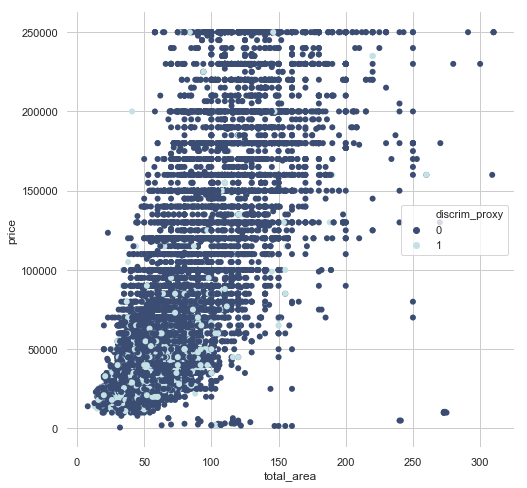

In [14]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='total_area', y="price",
                hue="discrim_proxy", #size="depth",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data)#, ax=ax)
plt.savefig('pic1.png')

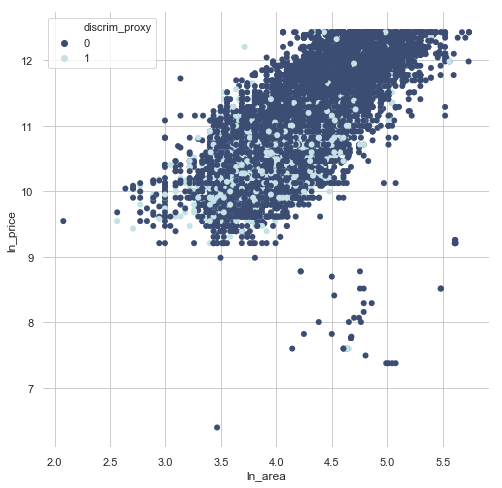

In [15]:
data['ln_price'] = np.log(data['price'])
data['ln_area'] = np.log(data['total_area'])
f, ax = plt.subplots(figsize=(8, 8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='ln_area', y="ln_price",
                hue="discrim_proxy", #size="depth",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=data)#, ax=ax)
plt.savefig('pic1_log.png')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


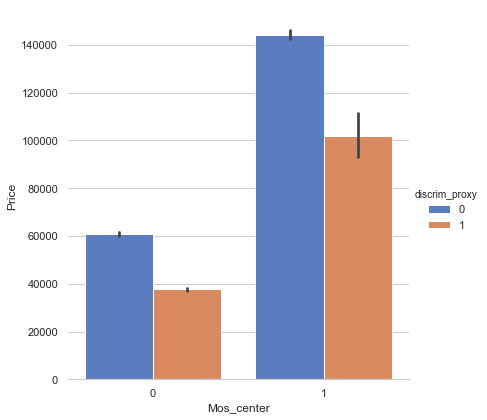

In [16]:
sns.set(style="whitegrid")
g = sns.catplot(x="Mos_center", y="price", hue="discrim_proxy", data = data,
height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Price")
plt.savefig('pic2.png')

# Модели

## Модель 1

In [17]:
m1 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area', data=data).fit(cov_type='HC0')
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     7245.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:05   Log-Likelihood:                -15581.
No. Observations:               24041   AIC:                         3.117e+04
Df Residuals:                   24038   BIC:                         3.119e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.8491      0.010    950.881

### Метод Бокса-Кокса

In [18]:
m_BC1 = smf.ols('price ~ 1 + discrim_proxy + total_area', data=data).fit(cov_type='HC0')
m_BC_ln1 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area', data=data).fit(cov_type='HC0')

In [19]:
from scipy import stats
price_ag = scipy.stats.gmean(data.loc[:,"price"])
data['price_BC'] = data['price'].apply(lambda y: y/price_ag)

In [20]:
ESS_BC1 = statsmodels.regression.linear_model.RegressionResults.ssr(m_BC1)
ESS_BC_ln1 = statsmodels.regression.linear_model.RegressionResults.ssr(m_BC_ln1)
if ESS_BC1 > ESS_BC_ln1:
    print('Модель с логарифмом лучше.')
else:
    print('Модель без логарифма лучше.')

Модель с логарифмом лучше.


## Модель 2 
Добавим в исходную модель 1 новую переменную Mos_center, которая равна единице, если квартира находится в пределах ЦАО.

In [21]:
m2 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area + Mos_center', data=data).fit(cov_type='HC0')
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     7658.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:05   Log-Likelihood:                -12729.
No. Observations:               24041   AIC:                         2.547e+04
Df Residuals:                   24037   BIC:                         2.550e+04
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.8632      0.009   1054.727

In [22]:
hypotheses = '(Mos_center = 0)'
f_test = m2.f_test(hypotheses)
print(f_test)

<F test: F=array([[5149.07219145]]), p=0.0, df_denom=24037, df_num=1>


Таким образом, добавление этой переменной привело к существенному улучшению модели.

## Модель 3
Попробуем добавить бинарные переменные для районов Москвы. Но в этом случае стоит убрать переменную Mos_center, так как все бинарные переменные соответсвуют районам из ЦАО .

In [23]:
region_list = ['Akimanka_rajon',
       'Hamovniki_rajon', 'Tverskoj_rajon', 'Taganskij_rajon',
       'Krasnoselskij_rajon', 'Mesanskij_rajon', 'Zamoskvorece_rajon',
       'Basmannyj_rajon', 'Arbat_rajon']
region = "+".join(region_list)

(data[region_list].sum()).sum() # Единичного вектора не получается, если что

4034

Как мне рассказали мои московские коллеги (Илья Зайцев, э304), все указанные регионы входят в ЦАО. Поэтому одновременное включение бинарных переменных для регионов и Mos_center приводят к чистой мультиколлинеарности. 

In [24]:
if data[region_list].sum(axis=1).all() == data['Mos_center'].all():
    print('Включение всех переменных приводит к чистой м/к')

Включение всех переменных приводит к чистой м/к


In [25]:
m3 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area + ' + region, data=data).fit(cov_type='HC0')
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     3191.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:06   Log-Likelihood:                -12623.
No. Observations:               24041   AIC:                         2.527e+04
Df Residuals:                   24029   BIC:                         2.537e+04
Df Model:                          11                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.8680    

In [26]:
hypotheses = '(Akimanka_rajon=0),(Hamovniki_rajon=0), (Tverskoj_rajon=0), (Taganskij_rajon=0), \
    (Krasnoselskij_rajon=0), (Mesanskij_rajon=0), (Zamoskvorece_rajon=0), (Basmannyj_rajon=0), (Arbat_rajon=0)'
f_test = m3.f_test(hypotheses)
print(f_test)

<F test: F=array([[702.85531328]]), p=0.0, df_denom=24029, df_num=9>


Результаты теста показывают, что данную группу переменных стоит включить в модель. 
### Mos_center или бинарные переменные для районов?
Модель 2 и модель 3 являются невложенными (unnested), поэтому чтобы их сравнить, нужно создать одну модель, которая будет включать все эти переменные и оценить их значимость. Однако из-за "ловушки дамми-переменных" эо сделать нельзя. На основе $R^2_{adj}$ следует все же выбрать модель 3 с добавлением бинарных переменных для районов.

## Модель 4
Теперь попробуем добавить бинарную переменную starii_fond.

In [27]:
m4 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area + starii_fond + ' + region, data=data).fit(cov_type='HC0')
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2963.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:06   Log-Likelihood:                -12620.
No. Observations:               24041   AIC:                         2.527e+04
Df Residuals:                   24028   BIC:                         2.537e+04
Df Model:                          12                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.8683    

In [28]:
hypotheses = '(starii_fond = 0)'
f_test = m4.f_test(hypotheses)
print(f_test)

<F test: F=array([[8.72989948]]), p=0.003133372905922515, df_denom=24028, df_num=1>


Результаты теста на короткую и длинную регрессию говорят в пользу добавления переменной starii_fond.

## Модель 5
В данную модель попробуем включить бинарную переменную first_floor. 

In [29]:
m5 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area + starii_fond + first_floor + ' + region, data=data).fit(cov_type='HC0')
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     2831.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:06   Log-Likelihood:                -12578.
No. Observations:               24041   AIC:                         2.518e+04
Df Residuals:                   24027   BIC:                         2.530e+04
Df Model:                          13                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.8791    

In [30]:
hypotheses = '(first_floor=0)'
f_test = m5.f_test(hypotheses)
print(f_test)

<F test: F=array([[64.47705479]]), p=1.0210824550006999e-15, df_denom=24027, df_num=1>


## Модель 6
Добавим в модель переменные для количества комнат: 'one_room', 'two_rooms', 'three_rooms'. Мы не будем включать переменную 'four_and_over_rooms', так в этом случае мы попадем в "ловушку фиктивных переменных". 

In [31]:
rooms = ['one_room','two_rooms', 'three_rooms']
rooms = "+".join(rooms)

In [32]:
m6 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area + starii_fond + first_floor + ' + region + '+' \
             + rooms, data=data).fit(cov_type='HC0')
print(m6.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     3409.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:07   Log-Likelihood:                -12120.
No. Observations:               24041   AIC:                         2.427e+04
Df Residuals:                   24024   BIC:                         2.441e+04
Df Model:                          16                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.9510    

In [33]:
hypotheses = '(one_room = 0), (two_rooms = 0), (three_rooms = 0)'
f_test = m6.f_test(hypotheses)
print(f_test)

<F test: F=array([[247.13842273]]), p=5.875158745463881e-158, df_denom=24024, df_num=3>


## Модель 7

В эту модель попробуем добавить бинарную переменную repair, равную единице для квартир с ремонтом. 

In [34]:
m7 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area + starii_fond + first_floor + repair +' + region + \
             '+'+ rooms, data=data).fit(cov_type='HC0')
print(m7.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     3443.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:07   Log-Likelihood:                -11533.
No. Observations:               24041   AIC:                         2.310e+04
Df Residuals:                   24023   BIC:                         2.325e+04
Df Model:                          17                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.9055    

Эта переменная является значимой на любом стандартном уровне значимости, значит, ее стоит оставить.  

## Модель 8 

На этот раз постоим модель еще и с учетом типа дома.

In [35]:
htype_list = ['blochnii', 'derevjannii', 'kirpichnii', 'monolitnii', 'panelnii', 'stalinskii']
cs = 0
for i in htype_list:
    cs += data[i].sum()
print(cs)
htype = "+".join(htype_list)

17424


In [36]:
m8 = smf.ols('np.log(price) ~ 1 + discrim_proxy + total_area + starii_fond + first_floor + repair +' + region + '+' \
             + htype + '+' + rooms, data=data).fit(cov_type='HC0')
print(m8.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     2680.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:08   Log-Likelihood:                -11337.
No. Observations:               24041   AIC:                         2.272e+04
Df Residuals:                   24017   BIC:                         2.292e+04
Df Model:                          23                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.0171    

In [37]:
hypotheses = '(blochnii = 0), (derevjannii = 0), (kirpichnii = 0), (monolitnii = 0), (panelnii = 0), (stalinskii = 0)'
f_test = m8.f_test(hypotheses)
print(f_test)

<F test: F=array([[75.6026226]]), p=6.534744467983691e-94, df_denom=24017, df_num=6>


Таким образом, нулевая гипотеза отвергается, значит, включение переменных для типа дома действительно привело к улучшению модели.

## Модель 9
Исходя из графиков, можно предположить, что связь между площадью квартиры и стоимсоть аренды не является линейной. 

In [38]:
m9 = smf.ols('np.log(price) ~ 1 + discrim_proxy + np.log(total_area) + starii_fond + first_floor + repair +' + region + '+' \
             + htype + '+' + rooms, data=data).fit(cov_type='HC0') 
print(m9.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2994.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:08   Log-Likelihood:                -10942.
No. Observations:               24041   AIC:                         2.193e+04
Df Residuals:                   24017   BIC:                         2.213e+04
Df Model:                          23                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7271    

### Логарифмическая или линейная модель?

In [39]:
m_both = smf.ols('np.log(price) ~ 1 + discrim_proxy + np.log(total_area) + total_area + starii_fond + first_floor + repair +' + region + '+' \
             + htype + '+' + rooms, data=data).fit(cov_type='HC0') 
print(m_both.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     2971.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:09   Log-Likelihood:                -10914.
No. Observations:               24041   AIC:                         2.188e+04
Df Residuals:                   24016   BIC:                         2.208e+04
Df Model:                          24                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.3166    

Таким образом, в модель стоит добавить все-таки логарифм переменной 'total_area'.
## Финальная модель

In [40]:
#htype_final = ['derevjannii', 'kirpichnii', 'monolitnii', 'panelnii', 'stalinskii',] # все, кроме блочных домов
#htype = "+".join(htype_final)
model = smf.ols('np.log(price) ~ 1 + discrim_proxy + np.log(total_area) + starii_fond + first_floor + repair +' + region + '+' \
             + htype + '+' + rooms, data=data).fit(cov_type='HC0') 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2994.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        22:40:09   Log-Likelihood:                -10942.
No. Observations:               24041   AIC:                         2.193e+04
Df Residuals:                   24017   BIC:                         2.213e+04
Df Model:                          23                                         
Covariance Type:                  HC0                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7271    

In [41]:
#print(model.summary().as_latex())

# Тест Чоу
Есть два аналогичных варианта теста Чоу. 

1. Пусть рассматривается модель: $ y_i = \beta_{1} + \beta_{2} x_i + \beta_{3} D_i + \beta_{4} x_i D_i $. Чтобы проверить оправдано ли включение фиктивных переменных в модель, нужно проверить гипотезу: $ \beta_{3} = \beta_{4} = 0 $. Это можно сделать при помощи теста на "короткую" и длинную" регрессию, который в этом случае называется тестом Чоу. 
Для модели множественной регрессии аналогично оценивается модель: $ y_i = D_i {x_{i}}^T b_1 + (1 - D_i) {x_{i}}^T b_2 $, и проверяется нулевая гипотеза: $ b_1 = b_2 = 0 $.

2. Пусть есть две подвыборки, для которых оцениваются модели: $ y_i = \alpha_1 + \alpha_2 {x_i}^{(2)} + \alpha_3 {x_i}^{(3)} + \dots + \alpha_k {x_i}^{(k)}$ и $ y_i = \beta_1 + \beta_2 {x_i}^{(2)} + \beta_3 {x_i}^{(3)} + \dots + \beta_k {x_i}^{(k)}$.
Нулевая гипотеза: $ \alpha_1 = \beta_1, \dots \alpha_k = \beta_k $ (Данные однородны и структурного сдвига в них нет). Тестовая статистика имеет вид: $$ \dfrac{(ESS_{\sum} - ESS_A - ESS_B)/k}{(ESS_A + ESS_B)/(n-2k)}$$ Она имеет распределение Фишера $F(k,n-2k)$. ESS в данном случае это сумма квадратов остатков. 

NB! В пакете statsmodels есть две функции: ess() (estimated sum of squares -- оцененная сумма квадратов, в рамках нашего курса обозначается RSS) и ssr() (sum of squared residuals -- сумма квадратов остатков, в рамках нашего курса обозначается ESS).
Дальше используется второй вариант теста Чоу.

In [42]:
data_A = data[data['discrim_proxy'] == 1]
data_B = data[data['discrim_proxy'] == 0]

#I(total_area*total_area) +

In [43]:
m_chow = smf.ols('np.log(price) ~ 1 + discrim_proxy + np.log(total_area)  + starii_fond + first_floor + repair +' + region + '+' \
             + htype, data=data).fit(cov_type='HC0')
m_chow_A = smf.ols('np.log(price) ~ 1 + discrim_proxy + np.log(total_area)  + starii_fond + first_floor + repair +' + region + '+' \
             + htype, data=data_A).fit(cov_type='HC0')
m_chow_B = smf.ols('np.log(price) ~ 1 + discrim_proxy + np.log(total_area) + starii_fond + first_floor + repair +' + region + '+' \
             + htype, data=data_B).fit(cov_type='HC0')

In [44]:
import statsmodels 
# ESS для выбранной модели 
ESS_sum = statsmodels.regression.linear_model.RegressionResults.ssr(m_chow)
# ESS для подвыборки с дискриминацией (discrim_proxy = 1)
ESS_A = statsmodels.regression.linear_model.RegressionResults.ssr(m_chow_A)
# ESS для подвыборки без дискриминации (discrim_proxy = 0)
ESS_B = statsmodels.regression.linear_model.RegressionResults.ssr(m_chow_B)
# общее количество наблюдений 
n = data.shape[0]
k = 1 + m_chow.df_model # прибавляем единицу, так как этот атрибут не учитывает константу 
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

In [45]:
import scipy
from scipy.stats import f

F = ((ESS_sum - ESS_A - ESS_B)/k)/((ESS_A + ESS_B)/(n-2*k))
print(F)

alpha = 0.01 # требуемый уровень значимости
p_value = scipy.stats.f.cdf(F, n, n-2*k)

if p_value > alpha:
    print('Нулевая гипотеза отклоняется при 1%-ом уровне значимости. В данных есть структурные сдвиги.')
else:
    print('Нулевая гипотеза принимается при 1%-ом уровне значимости. Структурных сдвигов в данных нет.')

20.0583746071497
Нулевая гипотеза отклоняется при 1%-ом уровне значимости. В данных есть структурные сдвиги.


## Метод Бокса-Кокса

Некорректно сравнивать между собой, если у них разные зависимые переменные: логарифм цены и просто цена. Метод Бокса-Кокса позволит нам выбрать между моделями.

In [46]:
from scipy import stats
price_ag = scipy.stats.gmean(data.loc[:,"price"])
data['price_BC'] = data['price'].apply(lambda y: y/price_ag)

In [47]:
m_BC = smf.ols('price_BC ~ 1 + discrim_proxy + np.log(total_area) + starii_fond + first_floor + repair +' + region + '+' \
             + htype, data=data).fit(cov_type='HC0')
m_BC_ln = smf.ols('np.log(price_BC) ~ 1 + discrim_proxy + np.log(total_area) +  starii_fond + first_floor + repair +' + region + '+' \
             + htype, data=data).fit(cov_type='HC0')

In [48]:
ESS_BC = statsmodels.regression.linear_model.RegressionResults.ssr(m_BC)
ESS_BC_ln = statsmodels.regression.linear_model.RegressionResults.ssr(m_BC_ln)
if ESS_BC > ESS_BC_ln:
    print('Модель с логарифмом лучше.')
else:
    print('Модель без логарифма лучше.')

Модель с логарифмом лучше.


## Тест Рамсея
И вот здесь возникает проблема. Никакие из испробованных спецификаций не могут пройти этот тест. Последняя модель имеет сравнительно низкую F-статистику по этому тесту (в других моделях, в том числе линейных, F-статистика измеряется тысячами).

In [49]:
sso.reset_ramsey(model, 3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[760.61496225]]), p=5.123e-321, df_denom=24015, df_num=2>

# Сравнение моделей
Создадим лист из имен моделей. 

In [50]:
models = list(map(lambda i: 'm'+ str(i), range(1,9))) + ['model']
print(models)

['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'model']


In [51]:
from statsmodels.iolib.summary2 import summary_col 

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
'R-adj' : lambda x: f"{x.rsquared_adj:.2f}",
'No. observations' : lambda x: f"{int(x.nobs):d}"} 

results_table = summary_col(results=[m1, m2, m3, m4, m5, m6, m7, m8, model], 
float_format='%0.2f', 
stars = True, 
model_names = models, 
info_dict=info_dict, 
regressor_order=['Intercept', 
'total_area', 
'discrim_proxy', 
'Mos_center', 
'starii_fond', 
'Akimanka_rajon','Hamovniki_rajon', 'Tverskoj_rajon', 'Taganskij_rajon', 
'Krasnoselskij_rajon', 'Mesanskij_rajon', 'Zamoskvorece_rajon', 
'Basmannyj_rajon', 'Arbat_rajon', 
'first_floor',
'one_room','two_rooms', 'three_rooms',
'repair','blochnii', 'derevjannii', 
'kirpichnii', 'monolitnii', 'panelnii', 'stalinskii']) 

results_table.add_title('Table 2 - OLS Regressions') 
print(results_table)

                                     Table 2 - OLS Regressions
                       m1       m2       m3       m4       m5       m6       m7       m8     model  
----------------------------------------------------------------------------------------------------
Intercept           9.85***  9.86***  9.87***  9.87***  9.88***  9.95***  9.91***  10.02*** 6.73*** 
                    (0.01)   (0.01)   (0.01)   (0.01)   (0.01)   (0.03)   (0.03)   (0.03)   (0.06)  
total_area          0.02***  0.01***  0.01***  0.01***  0.01***  0.01***  0.01***  0.01***          
                    (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)   (0.00)           
discrim_proxy       -0.16*** -0.11*** -0.11*** -0.11*** -0.11*** -0.10*** -0.09*** -0.08*** -0.07***
                    (0.01)   (0.01)   (0.01)   (0.01)   (0.01)   (0.01)   (0.01)   (0.01)   (0.01)  
Mos_center                   0.60***                                                                
                            

In [52]:
#print(results_table.as_latex())

In [53]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'R-adj' : lambda x: f"{x.rsquared_adj:.2f}",
'No. observations' : lambda x: f"{int(x.nobs):d}"} 

results_table1 = summary_col(results=[m1, m2, m3, m4, m5], 
float_format='%0.2f', 
stars = True, 
model_names = ["m1", "m2", 'm3', 'm4', 'm5'], 
info_dict=info_dict, 
regressor_order=['Intercept', 
'total_area', 
'discrim_proxy', 
'Mos_center', 
'starii_fond', 
'Akimanka_rajon','Hamovniki_rajon', 'Tverskoj_rajon', 'Taganskij_rajon', 
'Krasnoselskij_rajon', 'Mesanskij_rajon', 'Zamoskvorece_rajon', 
'Basmannyj_rajon', 'Arbat_rajon', 
'first_floor',
'one_room','two_rooms', 'three_rooms',
'repair','blochnii', 'derevjannii', 
'kirpichnii', 'monolitnii', 'panelnii', 'stalinskii']) 

results_table.add_title('Table 2 - OLS Regressions') 
#print(results_table1.as_latex())

In [54]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}", 
           'R-adj' : lambda x: f"{x.rsquared_adj:.2f}",
'No. observations' : lambda x: f"{int(x.nobs):d}"} 

results_table2 = summary_col(results=[m6, m7, m8], 
float_format='%0.2f', 
stars = True, 
model_names = ["m6", 'm7', 'm8'], 
info_dict=info_dict, 
regressor_order=['Intercept', 
'total_area', 
'discrim_proxy', 
'Mos_center', 
'starii_fond', 
'Akimanka_rajon','Hamovniki_rajon', 'Tverskoj_rajon', 'Taganskij_rajon', 
'Krasnoselskij_rajon', 'Mesanskij_rajon', 'Zamoskvorece_rajon', 
'Basmannyj_rajon', 'Arbat_rajon', 
'first_floor',
'one_room','two_rooms', 'three_rooms',
'repair','blochnii', 'derevjannii', 
'kirpichnii', 'monolitnii', 'panelnii', 'stalinskii']) 

results_table.add_title('Table 2 - OLS Regressions') 
#print(results_table2.as_latex())